In [59]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [60]:
data_df=pd.read_csv('Creditcard_data.csv')
#data_df.head()
data_df.shape
#data_df.info()

(772, 31)

In [61]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: title={'center': 'before sampling'}, xlabel='Class'>

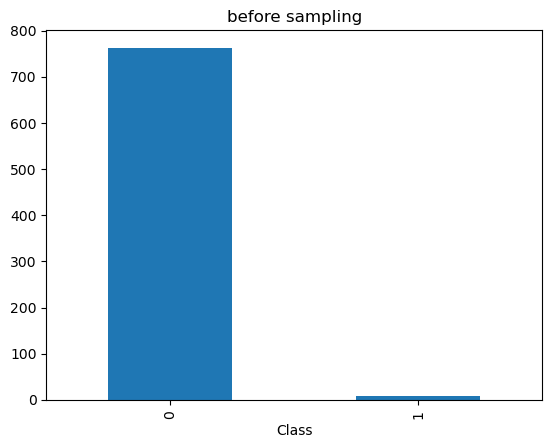

In [62]:
#data_df['Class'].value_counts()
data_df['Class'].value_counts().plot(kind="bar",title="before sampling")


In [63]:
X=data_df.drop('Class',axis=1)
y=data_df['Class']

#### OVERSAMPLING TECHNIQUE TO BALANCE THE DATASET
`USING SMOTE`

In [64]:
smote=SMOTE()
X_newsample,y_newsample=smote.fit_resample(X, y)
data_new=X_newsample.join(y_newsample)
data_new
data_new.shape

(1526, 31)

In [65]:
data_new['Class'].value_counts()

Class
0    763
1    763
Name: count, dtype: int64

<Axes: title={'center': 'After sampling'}, xlabel='Class'>

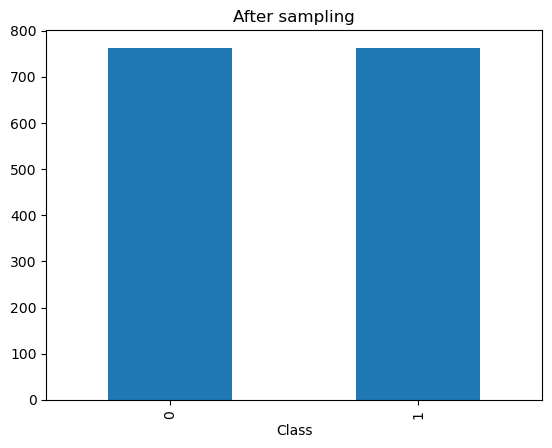

In [66]:
data_new['Class'].value_counts().plot(kind='bar',title='After sampling')

In [67]:
population_size = X_newsample.shape[0]
n = 1.96**2*0.5*0.5/0.05**2
n

384.1599999999999

#### MAKING SAMPLES


1. SIMPLE RANDOM SAMPLING

In [68]:
import math
data_random_sample = data_new.sample(n=math.ceil(n), random_state=42 , replace=False)
data_random_sample.head()
data_random_sample.shape

(385, 31)

2. SYSTEMATIC SAMPLING

In [69]:
k = int((population_size)/math.ceil(n))
start = np.random.randint(0, k)
systematic_sample = data_new.iloc[start::k]
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
11,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
14,12,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0


3. CLUSTER SAMPLING


In [70]:
def get_clustered_Sample(data, n_per_cluster, num_select_clusters):
    N = len(data)
    K = int(N/n_per_cluster)
    df = None
    for k in range(K):
        sample_k = data.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        data = data.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

data_cluster_sample = get_clustered_Sample(data = data_new, n_per_cluster = int(n), num_select_clusters = 1)
data_cluster_sample.head()
#data_cluster_sample['cluster']

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
1463,400,-2.257443,1.919822,-1.562507,3.908742,-0.491300,-1.388013,-2.472317,1.362904,-2.709305,...,-0.043015,-0.451061,0.281525,0.011599,0.175488,0.260470,-0.134700,0.022733,1,0.0
63,42,-0.249361,0.399227,0.068009,-1.060619,2.410399,3.736574,0.316446,0.672296,0.015140,...,-0.616762,-0.156669,1.031135,0.120617,0.310494,-0.288299,-0.223964,32.510000,0,0.0
1119,353,-0.147957,0.381074,1.227009,0.365087,0.488282,-0.961489,0.595898,-0.173117,-0.078767,...,-0.116750,-0.120005,0.368960,0.328516,-0.257818,-0.075468,-0.069781,1.603949,1,0.0
449,327,1.162687,0.269139,0.163258,0.943088,-0.003225,-0.421822,0.213395,-0.125542,-0.396783,...,0.236577,-0.191415,0.042338,0.720315,-0.332043,0.009356,0.014457,36.710000,0,0.0
1378,475,-2.136171,-0.560376,0.693236,2.383512,1.163578,-0.284996,-2.296060,1.050849,-0.663644,...,0.660025,-0.034168,-0.344857,-0.104524,0.563766,0.043226,-0.158971,0.847346,1,0.0


4. BOOTSTRAP SAMPLING

In [71]:
data_bootstrap_sample = data_new.sample(n = math.ceil(n), replace = True, random_state = 42)
data_bootstrap_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1126,564,1.063153,0.451246,0.202456,0.870888,-0.366752,-1.087051,-0.049156,-0.122992,-0.137306,...,-0.243033,-0.777841,0.095351,0.341878,0.211495,0.098939,-0.006747,0.021449,1.219694,1
1459,533,-1.874598,-1.270229,1.851646,0.276148,1.720869,0.168225,-0.966167,0.476908,0.509070,...,0.132995,0.528280,0.028710,-0.559171,-0.274962,0.562571,-0.230648,-0.273237,1.259586,1
860,128,0.415622,-0.405338,0.725885,0.616389,0.644060,0.082159,-0.572731,0.256095,0.039815,...,-0.068159,-0.192721,0.149079,-0.465617,0.073195,0.304639,-0.037101,-0.030449,2.400653,1
1294,517,-2.028878,-2.091479,2.096797,1.399658,2.190928,0.410693,-2.148989,0.843151,0.620079,...,0.431062,1.083621,0.228522,-0.750159,-0.195355,0.798959,-0.089579,-0.168536,1.363741,1
1130,523,-0.875954,-1.382399,0.694612,1.483341,0.494235,-1.066162,0.209011,-0.139609,-0.127124,...,0.183680,-0.197542,0.746893,0.027173,0.250228,-0.024540,-0.136572,0.033335,263.064573,1


#### MODEL EVALUATION

1. LOGISTIC REGRESSION

1. SIMPLE RANDOM

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
scaler=StandardScaler()
X_random_sample = data_random_sample.drop('Class', axis = 1)
y_random_sample = data_random_sample['Class']
X_random_scaled = scaler.fit_transform(X_random_sample)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random_scaled, y_random_sample, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy for simple random sampling using LR:", accuracy)

Accuracy for simple random sampling using LR: 0.8706896551724138


2. SYSTEMATIC

In [73]:
X_systematic_sample = systematic_sample.drop('Class', axis = 1)
y_systematic_sample = systematic_sample['Class']
X_systematic_scaled = scaler.fit_transform(X_systematic_sample)
X_train_systematic, X_test_systematic, y_train_systematic, y_test_systematic = train_test_split(X_systematic_scaled, y_systematic_sample, test_size=0.3, random_state=42)

model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy for simplifed random sampling using LR:", accuracy)

Accuracy for simplifed random sampling using LR: 0.9215686274509803


3. CLUSTER

In [74]:
X_cluster_sample = data_cluster_sample.drop('Class', axis = 1)
y_cluster_sample = data_cluster_sample['Class']
X_cluster_scaled = scaler.fit_transform(X_cluster_sample)
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster_scaled, y_cluster_sample, test_size=0.3, random_state=42)

model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)

accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy for cluster sampling using LR :", accuracy)

Accuracy for cluster sampling using LR : 0.8970588235294118


4. BOOTSTRAP

In [75]:
X_bootstrap_sample = data_bootstrap_sample.drop('Class', axis = 1)
y_bootstrap_sample = data_bootstrap_sample['Class']
X_bootstrap_scaled = scaler.fit_transform(X_bootstrap_sample)
X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(X_bootstrap_scaled, y_bootstrap_sample, test_size=0.3, random_state=42)

model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)

accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy for bootstrap sampling using LR :", accuracy)

Accuracy for bootstrap sampling using LR : 0.9655172413793104


#### SVC

1. SIMPLE RANDOM

In [76]:
from sklearn import svm
model= svm.SVC()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using SVC:", accuracy)

Accuracy of Simple Random Sampling using SVC: 0.9224137931034483


2. SYSTEMATIC

In [77]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using SVC:", accuracy)

Accuracy of Systematic Random Sampling using SVC: 0.9477124183006536


3. CLUSTER

In [78]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using SVC:", accuracy)

Accuracy of Cluster Sampling using SVC: 0.9705882352941176


4. BOOTSTRAP

In [79]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using SVC:", accuracy)

Accuracy of Bootstrap Sampling using SVC: 0.9568965517241379


#### XGBOOST CLASSIFIER

1. SIMPLE RANDOM

In [80]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using xgb:", accuracy)

Accuracy of Simple Random Sampling using xgb: 0.9396551724137931


2. SYSTEMATIC

In [81]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using xgb:", accuracy)

Accuracy of Systematic Random Sampling using xgb: 0.9673202614379085


3. CLUSTER

In [82]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using xgb:", accuracy)

Accuracy of Cluster Sampling using xgb: 0.9558823529411765


4. BOOTSTRAP

In [83]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using xgb:", accuracy)

Accuracy of Bootstrap Sampling using xgb: 0.9482758620689655


#### RANDOM FOREST

1. SIMPLE RANDOM

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using RF:", accuracy)

Accuracy of Simple Random Sampling using RF: 0.9913793103448276


2. SYSTEMATIC

In [85]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using RF:", accuracy)

Accuracy of Systematic Random Sampling using RF: 0.9738562091503268


3. CLUSTER

In [86]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using RF:", accuracy)

Accuracy of Cluster Sampling using RF: 1.0


4. BOOTSTRAP

In [87]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using RF:", accuracy)

Accuracy of Bootstrap Sampling using RF: 0.9827586206896551


#### GAUSSIAN NAVES BAYES

1. SIMPLE RANDOM

In [88]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using NB:", accuracy)

Accuracy of Simple Random Sampling using NB: 0.8017241379310345


2. SYSTEMATIC

In [89]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using NB:", accuracy)

Accuracy of Systematic Random Sampling using NB: 0.7647058823529411


3. CLUSTER

In [90]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using NB:", accuracy)

Accuracy of Cluster Sampling using NB: 0.7647058823529411


4. BOOTSTRAP

In [91]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using NB:", accuracy)

Accuracy of Bootstrap Sampling using NB: 0.8706896551724138


#### BEST IS RANDOM FOREST EVALUATION WITH CLUSTERING SAMPLING METHOD